In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob as glob
import numpy as np

In [ ]:
files = glob.glob("*.csv")
files

['Capacity_by_country_2007-2024.csv',
 'Solar_cost_2010-2023.csv',
 'US_Import_Export.csv',
 'US_shipments_2006-2024.csv',
 'China export.csv',
 'Panels_by_country_MW.csv']

In [ ]:
df0 = pd.DataFrame()
for a in files :
  df = pd.read_csv(a)
  #print(df.head())
  print(df.shape)
  print('===')

(149, 21)
===
(140, 6)
===
(35, 6)
===
(52, 6)
===
(17083, 9)
===
(183, 11)
===


In [ ]:
#solar panel cost
df1 = pd.read_csv('Solar_cost_2010-2023.csv')
df1.head(100)

,Scale,Year,Type,Type (group) 1,Units,SUM(Value)
0,Residential,2023,Module,Module,2022 REAL USD,0.338191
1,Residential,2022,Module,Module,2022 REAL USD,0.659007
2,Residential,2021,Module,Module,2022 REAL USD,0.377703
3,Residential,2020,Module,Module,2022 REAL USD,0.464555
4,Residential,2019,Module,Module,2022 REAL USD,0.462827
...,...,...,...,...,...,...
95,Utility ground mount (one-axis tracker),2012,Inverter,Inverter,2022 REAL USD,0.323539
96,Utility ground mount (one-axis tracker),2011,Inverter,Inverter,2022 REAL USD,0.384325
97,Utility ground mount (one-axis tracker),2010,Inverter,Inverter,2022 REAL USD,0.324903
98,Utility ground mount (one-axis tracker),2023,Hardware BOS - Structural and Electrical Compo...,Hardware - Balance of Systems,2022 REAL USD,0.303780


In [ ]:
#deleting non-residential
df1 = df1[df1['Scale'] != "Utility ground mount (one-axis tracker)"]
df1.head(100)

,Scale,Year,Type,Type (group) 1,Units,SUM(Value)
0,Residential,2023,Module,Module,2022 REAL USD,0.338191
1,Residential,2022,Module,Module,2022 REAL USD,0.659007
2,Residential,2021,Module,Module,2022 REAL USD,0.377703
3,Residential,2020,Module,Module,2022 REAL USD,0.464555
4,Residential,2019,Module,Module,2022 REAL USD,0.462827
...,...,...,...,...,...,...
65,Residential,2014,Labor,Soft Costs - Labor,2022 REAL USD,0.401498
66,Residential,2013,Labor,Soft Costs - Labor,2022 REAL USD,0.991016
67,Residential,2012,Labor,Soft Costs - Labor,2022 REAL USD,0.797707
68,Residential,2011,Labor,Soft Costs - Labor,2022 REAL USD,0.846712


In [ ]:
types = df1['Type (group) 1'].unique()
print(types)


['Module' 'Inverter' 'Hardware - Balance of Systems' 'Soft Costs - Other'
 'Soft Costs - Labor']


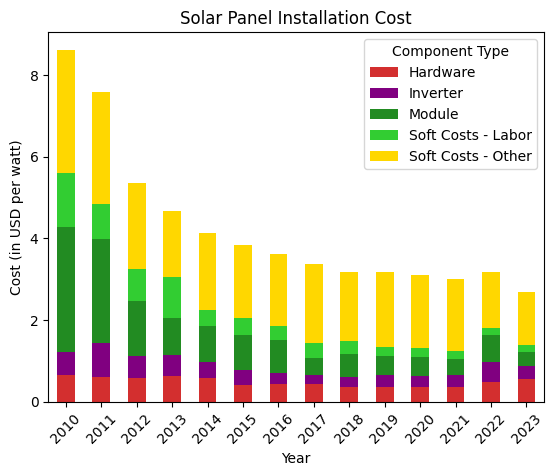

In [ ]:
#plotting installation cost. Data from National Renewable Energy Laboratory: https://www.nrel.gov/solar/market-research-analysis/solar-installed-system-cost.html
Install1 = df1.copy()
Install1 = Install1.rename(columns={'SUM(Value)': 'Cost in USD'})
Install1['Type (group) 1'] = Install1['Type (group) 1'].replace('Hardware - Balance of Systems', 'Hardware')
Install1 = Install1[Install1['Type (group) 1'].isin(['Module', 'Inverter', 'Hardware', 'Soft Costs - Other', 'Soft Costs - Labor'])]
df_grouped = Install1.groupby(['Year', 'Type (group) 1'])['Cost in USD'].sum().reset_index()
df_pivot = df_grouped.pivot_table(index='Year', columns='Type (group) 1', values='Cost in USD')
colors = ['#D32F2F', '#800080', '#228B22', '#32CD32', '#FFD700']
df_pivot.plot(kind='bar', stacked=True, color=colors)
plt.ylabel('Cost (in USD per watt)')
plt.title('Solar Panel Installation Cost')
plt.legend(title='Component Type')
plt.xticks(rotation=45)

plt.show()

Group  Other Cost  Panels & Hardware
Year                                
2010     4.343029           4.270848
2011     3.581395           3.996048
2012     2.888762           2.458301
2013     2.619434           2.062171
2014     2.270973           1.850631
2015     2.211178           1.639431
2016     2.110711           1.503204
2017     2.279788           1.083062
2018     2.022893           1.164339
2019     2.043689           1.130605
2020     1.993390           1.108561
2021     1.956534           1.044512
2022     1.554370           1.628136
2023     1.460162           1.222017


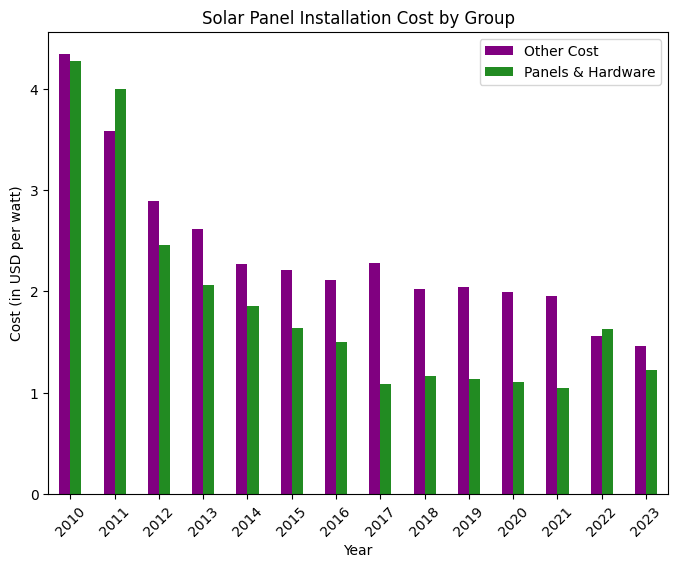

In [ ]:
Install2 = df1.copy()
Install2 = Install2.rename(columns={'SUM(Value)': 'Cost in USD'})
group_mapping = {
    'Module': 'Panels & Hardware',
    'Inverter': 'Panels & Hardware',
    'Hardware - Balance of Systems': 'Panels & Hardware',
    'Soft Costs - Other': 'Other Cost',
    'Soft Costs - Labor': 'Other Cost'
}
Install2['Group'] = Install2['Type (group) 1'].map(group_mapping)
df_grouped = Install2.groupby(['Year', 'Group'])['Cost in USD'].sum().reset_index()
df_pivot = df_grouped.pivot_table(index='Year', columns='Group', values='Cost in USD')
print(df_pivot)


colors = ['#800080', '#228B22']
ax = df_pivot.plot(kind='bar', color=colors, figsize=(8, 6))
ax.set_ylabel('Cost (in USD per watt)')
ax.set_title('Solar Panel Installation Cost by Group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend()
plt.show()

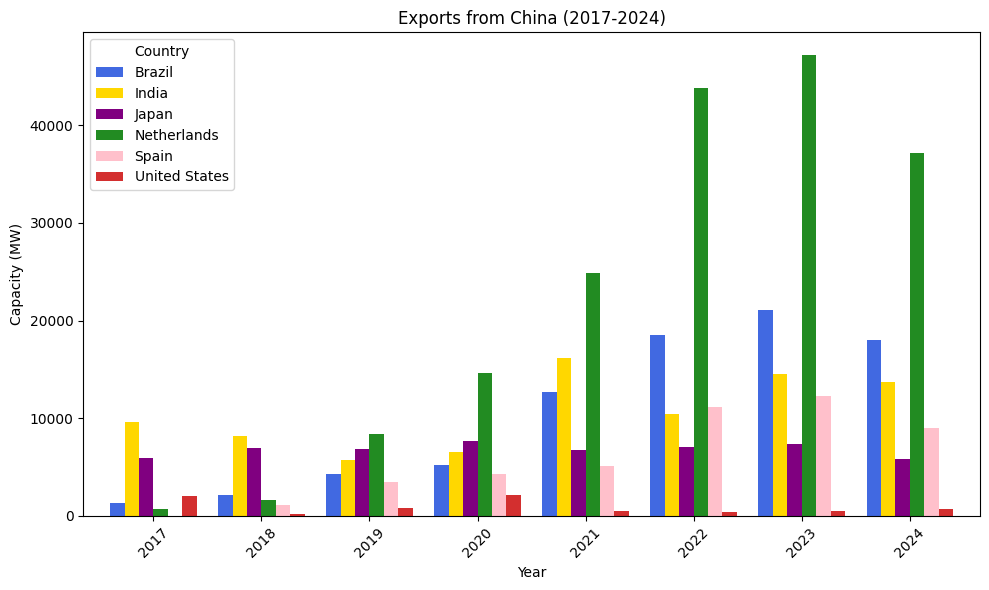

In [ ]:
#looking at China solar panels exports. Data from the energy think tank Ember https://ember-energy.org/data/china-solar-exports-data/#explore-this-data
df2 = pd.read_csv('China export.csv')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')
df2['Year'] = df2['Date'].dt.year
df_pivot = df2.pivot_table(index=['Area', 'Region'], columns='Year', values='Capacity (MW)', aggfunc='sum')
df_pivot = df_pivot.reset_index()
year_columns = [col for col in df_pivot.columns if col not in ['Area', 'Region']]
df_pivot[year_columns] = df_pivot[year_columns].apply(pd.to_numeric, errors='coerce')
df_pivot = df_pivot.dropna(subset=year_columns)
df_pivot['Total Exports'] = df_pivot[year_columns].sum(axis=1)
top_10 = df_pivot.nlargest(10, 'Total Exports')
filtered_countries = top_10.nlargest(5, 'Total Exports')['Area'].tolist()
if 'United States' not in filtered_countries:
    filtered_countries.append('United States')
df_filtered = df_pivot[df_pivot['Area'].isin(filtered_countries)]
df_filtered = df_filtered.drop(columns=['Total Exports'])
colors = ['#4169E1', '#FFD700', '#800080', '#228B22', '#FFC0CB', '#D32F2F']
ax = df_filtered.set_index('Area')[year_columns].T.plot(kind='bar', figsize=(10, 6), width=0.8, color=colors)
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.title('Exports from China (2017-2024)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


In [ ]:
#downloading for Flourish
df_pivot.to_csv('out.csv', index=False)

In [ ]:
#working with Chinese exports to US
to_us_export = df_pivot[df_pivot['Area'] == 'United States']
year_columns = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
ch_us_export = to_us_export[year_columns].sum().reset_index()
ch_us_export.columns = ['Year', 'Capacity (MW)']
ch_us_export['Year'] = ch_us_export['Year'].astype(int)
ch_us_export = ch_us_export.set_index('Year')
ch_us_export.head(10)


,Capacity (MW)
Year,
2017,1990.996339
2018,154.527100
2019,768.494966
2020,2102.500611
2021,487.661338
2022,366.163577
2023,539.340651
2024,755.067428


In [ ]:
#working with US shipments
US_produced = pd.read_csv('US_shipments_2006-2024.csv')
US_produced.head()

US_produced = US_produced.drop(range(0, 11))
US_produced['Total shipments (peak kilowatts)'] = (
    US_produced['Total shipments (peak kilowatts)']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)
US_produced.loc[17:28, "Year and month"] = "2022"
US_produced.loc[30:41, "Year and month"] = "2023"
US_produced.loc[43:49, "Year and month"] = "2024"
US_produced['Total shipments (peak kilowatts)'] = pd.to_numeric(US_produced['Total shipments (peak kilowatts)'], errors='coerce')
US_produced['Total shipments (peak kilowatts)'] = US_produced['Total shipments (peak kilowatts)'] / 1000
US_produced.rename(columns={'Total shipments (peak kilowatts)': 'Total shipments (MW)', 'Year and month': 'Year'}, inplace=True)
US_produced = US_produced[['Year',	'Total shipments (MW)']]
clean = US_produced.dropna()

clean.head(100)

,Year,Total shipments (MW)
11,2017,10864.545
12,2018,7971.622
13,2019,16372.314
14,2020,21770.903
15,2021,26339.920
17,2022,1517.757
18,2022,1303.063
19,2022,2239.901
20,2022,1549.900
21,2022,1752.018


In [ ]:
#making 2 tables to group data from the second table
part1 = clean.iloc[:5]
part2 = clean.iloc[5:]
part2.head()
part2_annual = part2.groupby('Year')['Total shipments (MW)'].sum().reset_index()
part2_annual.head()

,Year,Total shipments (MW)
0,2022,24914.968
1,2023,33176.227
2,2024,21665.153


In [ ]:
part1.dtypes

,0
Year,object
Total shipments (MW),float64


In [ ]:
part2_annual.dtypes

,0
Year,object
Total shipments (MW),float64


In [ ]:
#merging tables again into 1 data frame
usshipments = pd.concat([part1, part2_annual], axis=0)
usshipments = usshipments.pivot_table(index='Year', values='Total shipments (MW)')
usshipments.head(10)

,Total shipments (MW)
Year,
2017,10864.545
2018,7971.622
2019,16372.314
2020,21770.903
2021,26339.920
2022,24914.968
2023,33176.227
2024,21665.153


In [ ]:
#creating a data frame with the information on us imports. Data from the U.S. Energy Information Administration https://www.eia.gov/renewable/annual/solar_photo/archive/2018/
usimport_dict = {
    "Year": [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Import (MW)": [9996.943, 7237.775, 15316.877, 19286.540, 22971.066, 27832.582, 26285.615, 17506.002]
}

# Convert the dictionary to a DataFrame
usimport = pd.DataFrame(usimport_dict)

# Now use the pivot_table method
usimport = usimport.pivot_table(index='Year', values='Import (MW)')

# Check the result
print(usimport.head(10))

      Import (MW)
Year             
2017     9996.943
2018     7237.775
2019    15316.877
2020    19286.540
2021    22971.066
2022    27832.582
2023    26285.615
2024    17506.002


In [ ]:
print(usshipments.columns)
print(usimport.columns)
print(ch_us_export.columns)



Index(['Total shipments (MW)'], dtype='object')
Index(['Import (MW)'], dtype='object')
Index(['Capacity (MW)'], dtype='object')


In [ ]:
#merging all 3 data frames together
usshipments.index = usshipments.index.astype(int)
usimport.index = usshipments.index.astype(int)
ch_us_export.index = ch_us_export.index.astype(int)
ch_us_export.index = ch_us_export.index.astype(int)
merged_df = usshipments.merge(ch_us_export, left_index=True, right_index=True, how='inner')
merged = merged_df.merge(usimport, left_index=True, right_index=True, how='inner')
merged = merged.rename(columns={'Total shipments (MW)': 'Shipments (MW)', 'Capacity (MW)': 'China-US Export (MW)', 'Import (MW)': 'Total Import (MW)'})

merged.head(10)

,Shipments (MW),China-US Export (MW),Total Import (MW)
Year,,,
2017,10864.545,1990.996339,9996.943
2018,7971.622,154.527100,7237.775
2019,16372.314,768.494966,15316.877
2020,21770.903,2102.500611,19286.540
2021,26339.920,487.661338,22971.066
2022,24914.968,366.163577,27832.582
2023,33176.227,539.340651,26285.615
2024,21665.153,755.067428,17506.002


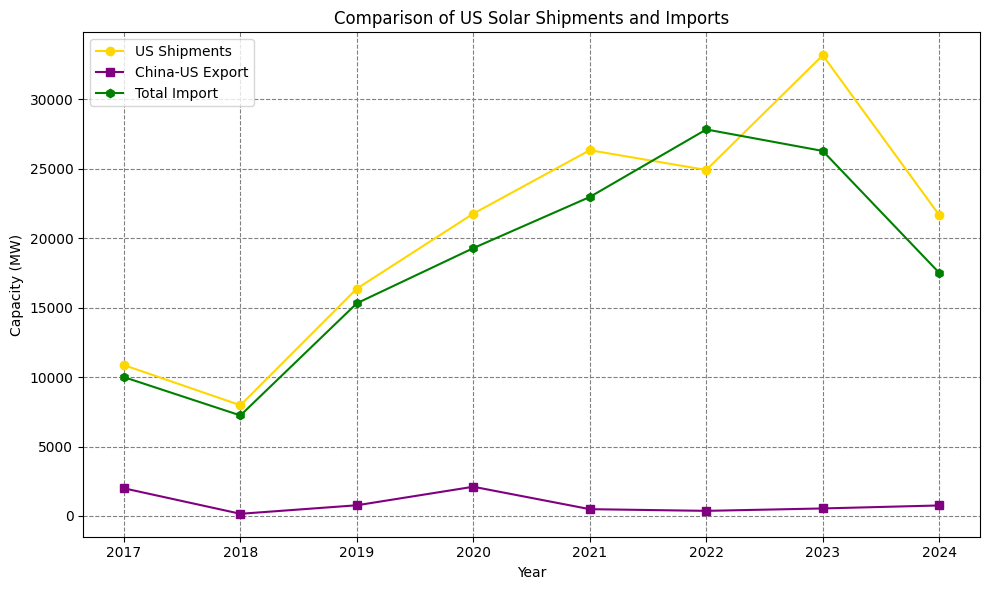

In [ ]:
#plotting the merged data frame
plt.figure(figsize=(10, 6))
plt.plot(merged.index, merged['Shipments (MW)'], label='US Shipments', marker='o', color='gold')
plt.plot(merged.index, merged['China-US Export (MW)'], label='China-US Export', marker='s', color='purple')
plt.plot(merged.index, merged['Total Import (MW)'], label='Total Import', marker='h', color='green')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.title('Comparison of US Solar Shipments and Imports')
plt.legend()
plt.grid(True, linestyle='--', color='gray')
plt.tight_layout()
plt.show()